<a href="https://colab.research.google.com/github/AmirKage/TDS-GroupProject24-25/blob/Final-Project_Chia-Yang-Kao/Testing_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Install HuggingFace Library
!pip install transformers

# Import Necessary Libraries
from transformers import pipeline

In [16]:
import json

# Path to your JSON file
file_path = r"/content/Q&ADataset2.json"  # Ensure this is the full path to your JSON file, including the file name.

# Load JSON data
with open(file_path, "r", encoding="utf-8-sig") as file: #encoding="utf-8-sig" handles potential Byte Order Mark (BOM) characters
    data = json.load(file)

# Function to categorize answers based on length
def categorize_answer_length(answer_text):
    word_count = len(answer_text.split())
    if word_count <= 5:
        return "short"
    elif word_count <= 20:
        return "moderate"
    else:
        return "long"

# Add difficulty field to each answer, but only if 'answers' key exists
for item in data:
    # Check if the 'answers' key exists in the current item
    if "answers" in item:
        for answer in item["answers"]:
            answer["difficulty"] = categorize_answer_length(answer["text"])



# Save the updated dataset
updated_file_path = r"/content/questionnaire_labeled.json" # Update with desired save path
with open(updated_file_path, "w", encoding="utf-8") as file:
    json.dump(data, file, indent=4)  # indent=4 for pretty printing

print(f"Labeled dataset saved to {updated_file_path}")

Labeled dataset saved to /content/questionnaire_labeled.json


In [17]:
import json

# Load the labeled dataset
labeled_file_path = r"/content/questionnaire_labeled.json"
with open(labeled_file_path, "r", encoding="utf-8") as file:
    labeled_data = json.load(file)

print(f"Loaded labeled dataset with {len(labeled_data)} entries.")



Loaded labeled dataset with 20 entries.


In [18]:
from transformers import pipeline

# Load a pre-trained Question-Answering model
qa_pipeline = pipeline("question-answering", model="deepset/roberta-base-squad2")

print("QA pipeline is ready for use.")


Device set to use cpu


QA pipeline is ready for use.


In [20]:
# Check if labeled_data is loaded
print(f"Loaded {len(labeled_data)} entries in labeled_data.")

results = []

for item in labeled_data:
    question = item["question"]
    context = item["context"]

    print(f"Processing Question: {question}")  # Print each question to track progress

    # Check if answers exist
    if "answers" not in item or not item["answers"]:
        print(f"Skipping Question: {question}, no answers found.")
        continue

    # Iterate through all standard answers
    for answer in item["answers"]:
        # Model inference
        model_output = qa_pipeline({"question": question, "context": context})
        print(f"Model Output: {model_output}")  # Debugging model output

        # Record the result
        results.append({
            "Question": question,
            "Context": context,
            "Model Answer": model_output.get("answer", ""),
            "Correct Answer": answer["text"],
            "Difficulty": answer.get("difficulty", "N/A"),
            "Score": model_output.get("score", 0),
            "Is Correct": model_output.get("answer", "").strip().lower() == answer["text"].strip().lower()
        })

# Print the first few results
if results:
    for res in results[:5]:
        print(res)
else:
    print("No results generated.")


Loaded 20 entries in labeled_data.
Processing Question: What role does guilt play in Amir's relationship with Hassan in 'The Kite Runner'?
Skipping Question: What role does guilt play in Amir's relationship with Hassan in 'The Kite Runner'?, no answers found.
Processing Question: How does Jane Eyre assert her independence in the face of societal norms?
Skipping Question: How does Jane Eyre assert her independence in the face of societal norms?, no answers found.
Processing Question: What does the green light symbolize in 'The Great Gatsby'?
Skipping Question: What does the green light symbolize in 'The Great Gatsby'?, no answers found.
Processing Question: How does George Orwell explore the theme of surveillance in '1984'?
Skipping Question: How does George Orwell explore the theme of surveillance in '1984'?, no answers found.
Processing Question: What role does social class play in the relationships depicted in 'Pride and Prejudice'?
Skipping Question: What role does social class play

In [21]:
from collections import defaultdict

# Calculate accuracy for different difficulty levels
accuracy_by_difficulty = defaultdict(lambda: {"correct": 0, "total": 0})

for res in results:
    difficulty = res["Difficulty"]
    accuracy_by_difficulty[difficulty]["total"] += 1
    if res["Is Correct"]:
        accuracy_by_difficulty[difficulty]["correct"] += 1

# Print accuracy rates
for difficulty, stats in accuracy_by_difficulty.items():
    accuracy = stats["correct"] / stats["total"] * 100
    print(f"Accuracy for {difficulty} answers: {accuracy:.2f}%")


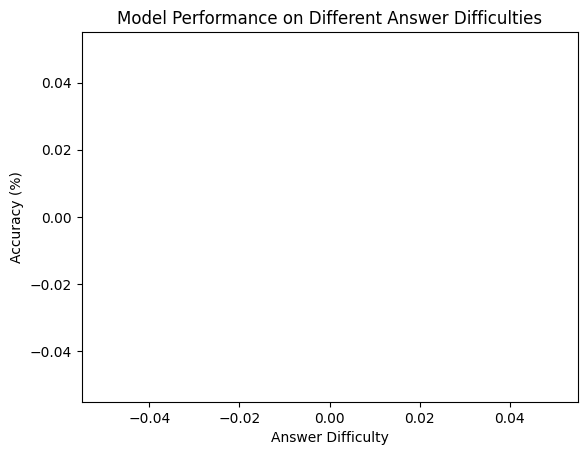

In [22]:
import matplotlib.pyplot as plt

# Prepare data
difficulties = list(accuracy_by_difficulty.keys())
accuracies = [accuracy_by_difficulty[d]["correct"] / accuracy_by_difficulty[d]["total"] * 100 for d in difficulties]

# Plot a bar chart
plt.bar(difficulties, accuracies)
plt.xlabel("Answer Difficulty")  # Label for the x-axis
plt.ylabel("Accuracy (%)")       # Label for the y-axis
plt.title("Model Performance on Different Answer Difficulties")  # Title of the chart
plt.show()



In [23]:
import pandas as pd

# Convert results into a DataFrame
results_df = pd.DataFrame(results)

# Save as a CSV file
results_file_path = r"/content/qa_results.csv"
results_df.to_csv(results_file_path, index=False)

print(f"Results saved to {results_file_path}")



Results saved to /content/qa_results.csv
